# Introduction to Network Science
### or "Graph Analysis"

The relevant python library is,

In [2]:
import networkx as nx

This is for working with graph data ("networks"),

## What is a Graph?

* nodes
    * row = object = data point
* edges
    * link = connection = relationship
* weights
    * data about the edge (relationship, link,...)

In [7]:
G = nx.complete_graph(10)

Note the nodes below are visualized as blue circles, and the edges are lines -- the weights are not show.

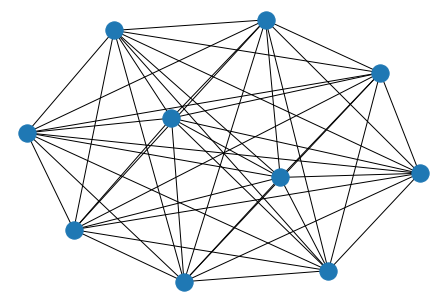

In [8]:
nx.draw(G)

## How do we represent a graph?

* adjacency matrix
    * **table** of numbers
        * stores weights
* edge list
    * **list** of edges (neighbors)
* adjacency list
    * **dictionary** of nodes -> neighbors

The table form is very inefficient, if you have 10 ppl you have 10 cols, and 10 rows,

In [9]:
table = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]

Many social graphs have millions of nodes... so $1mil^2$

An edge list is typically much much more economical, you store *just* the connections that there are,

In [10]:
edges = [
    (0, 1),
    (0, 2),
    (0, 3),
    (0, 4),
    (0, 5),
    (0, 6),
    (0, 7),
    (0, 8),
    (0, 9),
    (1, 2),
    # ...
]

In tabular form, this is two-cols.

In the above graph all nodes are connected to all others, so the same number of numbers is needed (diff num of cols)...

However most social are extremely low density (many many more nodes than edges: 7bn ppl,  150 friends/pp)... 

So an edge list ends up with far fewer entries.

### Aside: Adjaceny Dictionary (Lists)

An adjaceny "list" is about as space efficient as a node list, *but*, it can be faster to query for certain operations. 

Note: mathematicians use the word list, but in python, it's a dictionary.

In [11]:
graph = {
    0: [1, 2, 3, 4, 5, 6, 7, 8, 9],
    1: [1, 2, 3, 4, 5, 6, 7, 8, 9],
    2: [1, 2, 3, 4, 5, 6, 7, 8, 9],
}

eg., suppose I want to know who `0`'s friends are,

In [12]:
graph[0]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

but if i'm using an edgelist, there is no `0` key, i have to loop:

In [15]:
friends = []
for edge in edges:
    if edge[0] == 0:
        friends.append(edge[1])

In [16]:
friends

[1, 2, 3, 4, 5, 6, 7, 8, 9]

since the adjaceny dictionary tags the elements we can do this operation in one. 

## How do we analyse graphs?

* algorithms
    * simulating graphs
        * building graphs
    * traversing graphs
        * eg., counting edges, finding routes, 
* metrics
    * descriptive statistics which describe graphs
        * ie., not a *mean*, but a ... measure like a mean

## Case Study: Criminal Network

Suppose we are monitoring 4G network cell towers for known mobile handsets. We can aproximate the proximity of the people by how close their nearest cell tower is; and we can count the number of messages going between them.

In [32]:
nodes = ['Michael', 'Alice', 'Eve', 'Bob', 'Dan']


edges = [
    ('Michael', 'Alice', {'msg': 10, 'proximity': 0.5}),
    ('Michael', 'Eve',   {'msg': 10, 'proximity': 1.5}),
    ('Michael', 'Bob',   {'msg': 10, 'proximity': 1.5}),
    ('Alice', 'Eve',     {'msg': 6, 'proximity': 1}),
    ('Alice', 'Bob',     {'msg': 6, 'proximity': 1}),
    ('Bob', 'Eve',       {'msg': 1, 'proximity': 0.01}),
    ('Eve', 'Bob',       {'msg': 2, 'proximity': 0.01}),
    ('Eve', 'Dan',       {'msg': 2, 'proximity': 10}),
    
    ('Ian', 'Fred',       {'msg': 2, 'proximity': 12}),
]

In [33]:
C = nx.from_edgelist(edges)

### What algorithms can we run on a graph?

A depth-first search completely traverses as much of the graph as possible from a starting node -- it can only follow edges acutally present,

Dan is a candidate leader, who can he talk with?

In [35]:
for edge in nx.dfs_labeled_edges(C, 'Dan'):
    print(edge)
    
    # predtive analyusis

('Dan', 'Dan', 'forward')
('Dan', 'Eve', 'forward')
('Eve', 'Michael', 'forward')
('Michael', 'Alice', 'forward')
('Alice', 'Michael', 'nontree')
('Alice', 'Eve', 'nontree')
('Alice', 'Bob', 'forward')
('Bob', 'Michael', 'nontree')
('Bob', 'Alice', 'nontree')
('Bob', 'Eve', 'nontree')
('Alice', 'Bob', 'reverse')
('Michael', 'Alice', 'reverse')
('Michael', 'Eve', 'nontree')
('Michael', 'Bob', 'nontree')
('Eve', 'Michael', 'reverse')
('Eve', 'Alice', 'nontree')
('Eve', 'Bob', 'nontree')
('Eve', 'Dan', 'nontree')
('Dan', 'Eve', 'reverse')
('Dan', 'Dan', 'reverse')


Algorithmic operations on graphs are mostly likely to use a loop and perform some operation on each step.

### What metrics can we compute from graphs?

A centrality measure is a *measure of importance*, it's a ordinary number which *ranks* nodes,

In [39]:
nx.degree_centrality(C)

{'Michael': 0.5,
 'Alice': 0.5,
 'Eve': 0.6666666666666666,
 'Bob': 0.5,
 'Dan': 0.16666666666666666,
 'Ian': 0.16666666666666666,
 'Fred': 0.16666666666666666}

Degree centrality ranks by "number of friends", it's a percentage out of a total. In `C` there are `6` friends michael could have, he acutally knows `3`. 

(friend = message receiver; know = message). 

In [38]:
nx.betweenness_centrality(C)

{'Michael': 0.0,
 'Alice': 0.0,
 'Eve': 0.2,
 'Bob': 0.0,
 'Dan': 0.0,
 'Ian': 0.0,
 'Fred': 0.0}

Betweennecess centrality ranks people by how *between* others they are... ie., how much of a "hub" function they perform. Think about a transport hub like Heathrow, JFK... these airports connect between other airports.

In [40]:
nx.pagerank(C)

{'Michael': 0.14894828459348708,
 'Alice': 0.14894828459348708,
 'Eve': 0.20289637934863064,
 'Bob': 0.14894828459348708,
 'Dan': 0.0645444811566223,
 'Ian': 0.14285714285714285,
 'Fred': 0.14285714285714285}

Page Rank measures how important you are *by* "how important your friends are". 

Page Rank computes a score in many rounds, each round you get a point if your friends have a lot of friends. It is possible to be very important even with just one friend, eg., The President of the United States -- on the basis that they have a lot of important friends.

Google invented this for websites: websites with a lot of links to them (from websites with a lot of links to them) are very important.

### Case Study: Reviewing the Metrics

Who is the most important person?

In [45]:
max([ (r, n) for n, r in nx.degree_centrality(C).items() ])

(0.6666666666666666, 'Eve')

In [47]:
max([ (r, n) for n, r in nx.betweenness_centrality(C).items() ])

(0.2, 'Eve')

In [48]:
max([ (r, n) for n, r in nx.pagerank(C).items() ])

(0.20289637934863064, 'Eve')

Who is the lowest ranking person?

In [49]:
min([ (r, n) for n, r in nx.degree_centrality(C).items() ])

(0.16666666666666666, 'Dan')

In [50]:
min([ (r, n) for n, r in nx.betweenness_centrality(C).items() ])

(0.0, 'Alice')

In [51]:
min([ (r, n) for n, r in nx.pagerank(C).items() ])

(0.0645444811566223, 'Dan')

#### Aside: what is the python doing?

There is no such thing as `max` on a dictionary,

In [52]:
nx.degree_centrality(C)

{'Michael': 0.5,
 'Alice': 0.5,
 'Eve': 0.6666666666666666,
 'Bob': 0.5,
 'Dan': 0.16666666666666666,
 'Ian': 0.16666666666666666,
 'Fred': 0.16666666666666666}

We convert to `.items` which is a list version,

In [54]:
list(nx.degree_centrality(C).items())

[('Michael', 0.5),
 ('Alice', 0.5),
 ('Eve', 0.6666666666666666),
 ('Bob', 0.5),
 ('Dan', 0.16666666666666666),
 ('Ian', 0.16666666666666666),
 ('Fred', 0.16666666666666666)]

This is still no good, `max` needs the first entry to be the score,

In [55]:
[ (score, name) for name, score in nx.degree_centrality(C).items() ]

[(0.5, 'Michael'),
 (0.5, 'Alice'),
 (0.6666666666666666, 'Eve'),
 (0.5, 'Bob'),
 (0.16666666666666666, 'Dan'),
 (0.16666666666666666, 'Ian'),
 (0.16666666666666666, 'Fred')]

, reverses the order; so now I can write,

In [56]:
max([ (score, name) for name, score in nx.degree_centrality(C).items() ])

(0.6666666666666666, 'Eve')

## Exercise (30 min)

Design your own social network,

In [74]:

mygraph = [
    ('Michael', 'Alice'),
    ('Alice', 'Michael'),
    ('Eve', 'Michael')
]

load into networkx, 

In [67]:
M = nx.from_edgelist(mygraph)

Compute degree, betweenness (extra: pagerank), and then *modify* your original graph, to see the effect on these measures,

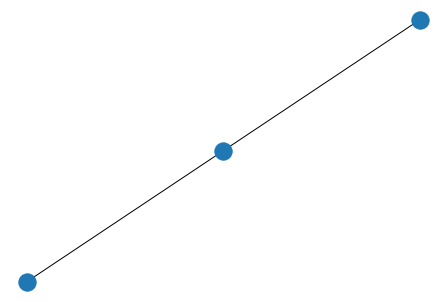

In [68]:
nx.draw(M)

In [69]:
nx.degree_centrality(M)

{'Michael': 1.0, 'Alice': 0.5, 'Eve': 0.5}

In [70]:
nx.betweenness_centrality(M)

{'Michael': 1.0, 'Alice': 0.0, 'Eve': 0.0}

In [71]:
nx.pagerank(M)

{'Michael': 0.48648582432442095,
 'Alice': 0.25675708783778944,
 'Eve': 0.25675708783778944}

#### Question
1. Add several more edges to this graph so that Michael is the most important node in each measure.
2. Add even more so michael is now the least important node.

HINT: you dont need to change the networkx code, just rerun. Rather update the `mygraph` so it has new rows, ie., edges.